<h1> Tarefa Prática 1° Bimestre - CTC-34</h1>
<h2>Expressões Regulares e Autômatos Finitos</h2>
<h3>Turma 2022</h3>
<h3>Alunos:
<ul><li>Carlos Renato de Andrade Figueiredo</li>
<li>Matheus da Silva Martins</li>
<li>Samara Ribeiro Silva</li>
</ul></h3>
<h3>Prof. Carlos Forster/ Prof. Ana Carolina</h3>

In [ ]:
#bibliotecas
from IPython.display import display,Image
from tabulate import tabulate
import pydot
from graphviz import Digraph, Source
import string

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

1 – Implementar o seguinte algoritmo, obtendo como entrada uma expressão regular e produzindoum autômato $\varepsilon$-AFN.

<ol>
<li>Inicia o autômato como um nó inicial e um nó final com transição especificando a expressão regular.<br>0, 1, ab+(b+c)*<br>próximo nó: 2</li>
<li>verificar se é uma união de linguagens (expressa
como A+B), separar a união em arcos<br>0, 1, ab<br>0, 1, (b+c)*</li>
<li>verificar se é uma concatenação de
linguagens, separar utilizando um novo nó<br>0, 2, a<br>2, 1, b
próximo nó: 3</li>
<li>se a expressão for um fecho de Kleene,
construir um loop em novo nó separado por $\varepsilon$-transições<br>0, 3, &
<br>3, 3, (b+c)<br>3, 1, &</li>
<li>se a expressão estiver entre parênteses, remover os parênteses.</li>
<li>repete II, III, IV, V e VI para cada arco até que todo arco tenha apenas um símbolo ou $\varepsilon$(repr &).</li>
</ol>

In [ ]:
def separarOr(text):
  strings = ['']
  cont_palavras = 0
  cont_parenteses = 0
  for i in text:
    # se o char for + e o cont_parenteses for 0, passo para proxima palavra(cont_palavras ++)
    if (i == '+' and cont_parenteses == 0):
      cont_palavras +=1
      strings.append('')
    elif (i == '('):
      cont_parenteses +=1
      strings[cont_palavras] += i
    elif (i == ')'):
      cont_parenteses -=1
      strings[cont_palavras]+= i
    else:
      strings[cont_palavras]+= i
  return strings

def separarAnd(text):
  strings = ['']
  cont_palavras = 0
  cont_parenteses = 0
  for i in range(len(text)):
    if (text[i] == '('):
      if (cont_parenteses == 0 and strings[cont_palavras]!=''):
        cont_palavras += 1
        strings.append('')
      cont_parenteses += 1 
      strings[cont_palavras] += text[i]
    elif (text[i] == ')'):
      cont_parenteses -=1
      strings[cont_palavras]+= text[i]
    elif (text[i] == '*'):
      strings[cont_palavras]+= text[i]
    elif (cont_parenteses != 0):
      strings[cont_palavras]+= text[i]
    else:
      if (strings[cont_palavras]!=''):
        cont_palavras += 1
        strings.append('')
      strings[cont_palavras]+= text[i]
  return strings

# 2. verificar se eh uniao de linguagens
def verificarUniao(nohInicio,nohFim,text):
  automato2 = []
  arcosUniao = separarOr(text)
  for arco in arcosUniao:
    automato2.append([nohInicio,nohFim,arco])
  return automato2

# 3. verificar se eh uma concatenação de linguagens, separar utilizando um novo no
def verificarConcatenacao(nohInicio,nohFim,text):
  automato3 = []
  arcosConc = separarAnd(text)
  qtdArcos = len(arcosConc)
  qtdNohAdd = qtdArcos-1
  global ultimoNoh

  nohs = [nohInicio]  
  for i in range(qtdNohAdd):
    #fazer um array de nohs    
    ultimoNoh +=1
    nohs.append(ultimoNoh)
  nohs.append(nohFim)

  for i in range(qtdArcos):
    #definir os arcos
    automato3.append([nohs[i],nohs[i+1],arcosConc[i]])
  
  return automato3

# 4. se for fecho de Kleein, construir um loope em novo no separado por &-transições
def verificarFechoKleene(nohInicio,nohFim,text):
  automato4 = []
  global ultimoNoh
  if ('*' in text[-1]):
    text = text[0:len(text)-1]
    ultimoNoh += 1
    automato4.append([nohInicio,ultimoNoh,'&'])
    automato4.append([ultimoNoh,ultimoNoh,text])
    automato4.append([ultimoNoh,nohFim,'&'])
  return automato4

# 5. Se a expressao estiver entre parentese, remover parenteses
def verificarParenteses(text):
  if('(' in text[0] and ')' in text[-1]):
    text = text[1:len(text)-1]
  return text

# Criação do automato, seguindo as regras propostas
def criarAutomato(automatoFinal):
  automato = automatoFinal
  automato = verificarUniao(automato[0][0],automato[0][1],automato[0][2])
  automato2 = []
  for arco in automato:
    automato2 += verificarConcatenacao(arco[0],arco[1],arco[2])
  automato = []
  for arco in automato2:
    valor = verificarFechoKleene(arco[0],arco[1],arco[2])
    if (valor != []):
      automato2.remove(arco)
      automato2 += valor
  for arco in automato2:
    arco[2]=verificarParenteses(arco[2])
    if (len(arco[2])!= 1 ):
      automato = criarAutomato([arco])
      automato2.remove(arco)
      automato2 += automato
  return automato2

In [ ]:
#bateria de testes
text=[]
text.append("(a+b)*bb(b+a)*")
text.append("(a(b+c))*")
text.append("a*b+b*a")
text.append("a*b*c*")

auto=[]
for i in range(len(text)):
  ultimoNoh=1
  auto.append(criarAutomato([[0,1,text[i]]]))
  print("Exemplo",i,"= ",auto[i])

Exemplo 0 =  [[2, 3, 'b'], [3, 4, 'b'], [0, 5, '&'], [5, 2, '&'], [4, 6, '&'], [6, 1, '&'], [5, 5, 'a'], [5, 5, 'b'], [6, 6, 'b'], [6, 6, 'a']]
Exemplo 1 =  [[0, 2, '&'], [2, 1, '&'], [2, 3, 'a'], [3, 2, 'b'], [3, 2, 'c']]
Exemplo 2 =  [[2, 1, 'b'], [3, 1, 'a'], [0, 4, '&'], [4, 4, 'a'], [4, 2, '&'], [0, 5, '&'], [5, 5, 'b'], [5, 3, '&']]
Exemplo 3 =  [[0, 4, '&'], [4, 4, 'a'], [4, 2, '&'], [3, 5, '&'], [5, 5, 'c'], [5, 1, '&'], [2, 6, '&'], [6, 6, 'b'], [6, 3, '&']]


Automato 0 :  (a+b)*bb(b+a)* 



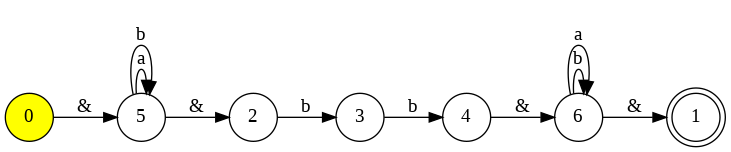

Automato 1 :  (a(b+c))* 



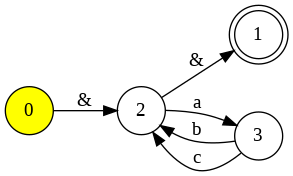

Automato 2 :  a*b+b*a 



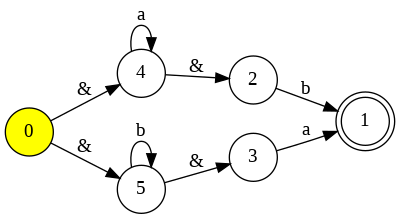

Automato 3 :  a*b*c* 



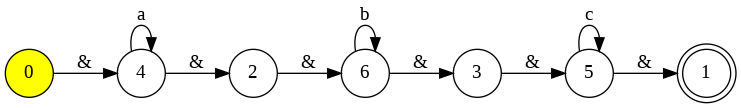

In [ ]:
#Desenhando os grafos dos automatos
#nesse caso, todos tera estado inicial no 0 e estado final no 1, conforme bateria de testes

def dfa2gv(auto):
  gv = ["digraph automaton{", 
        "rankdir=LR", 
        "node [shape=circle]",
        '0 [fillcolor="yellow",style="filled"]',
        "1 [shape=doublecircle]",
        ]
  for i in auto:
    gv.append('%s -> %s [label="%s"]' %(i[0], i[1], i[2]))
  gv.append("}")
  return "\n".join(gv)

def desenharAuto(automato):
  for i in range(len(automato)):
    dot=Source(dfa2gv(automato[i]))
    valor = "automato"+str(i)
    dot.render(format="png",filename=valor)
    print("Automato",i,": ",text[i],"\n",)
    display(Image(str(valor+'.png')))

desenharAuto(auto)

2 – Dado um $\varepsilon$-AFN como acima (estado inicial 0 e apenas estado final 1) e uma cadeia de entrada,
implemente uma função que retorna os possíveis estados após computação da cadeia e se o estado
final 1 pertence a esse conjunto de estados (isto é, se a cadeia é aceita ou não).

In [ ]:
def validandoCadeia(auto, cadeia, estadoinicial, cont):
  if estadoinicial == 1 and cont==len(cadeia) :
    return True
  valido1 = False
  valido2 = False
  lista =[]  
  for arco in auto:
    if arco[0]==estadoinicial:
      if cont < len(cadeia):
        if arco[2] == cadeia[cont]:
          valido1 = validandoCadeia(auto, cadeia,arco[1], cont+1)           
      if arco[2] == '&':
        valido2 = validandoCadeia(auto, cadeia,arco[1], cont)
      if valido1==True or valido2== True:
        return True       
  return False

In [ ]:
#Bateria de testes
teste1auto=[]
teste2auto=[]
teste3auto=[]
teste4auto=[]

for i in range(len(auto)):
  teste1auto.append(validandoCadeia(auto[i], "ab",0,0))
  teste2auto.append(validandoCadeia(auto[i], "abb",0,0))
  teste3auto.append(validandoCadeia(auto[i], "bba",0,0))
  teste4auto.append(validandoCadeia(auto[i], "abba",0,0))

  print("\nAutomato",i,":",text[i])
  print("teste auto1 ""ab"" = ",teste1auto[i])
  print("teste auto1 ""abb"" = ",teste2auto[i])
  print("teste auto1 ""bba"" = ",teste3auto[i])
  print("teste auto1 ""abba"" = ",teste4auto[i])


Automato 0 : (a+b)*bb(b+a)*
teste auto1 ab =  False
teste auto1 abb =  True
teste auto1 bba =  True
teste auto1 abba =  True

Automato 1 : (a(b+c))*
teste auto1 ab =  True
teste auto1 abb =  False
teste auto1 bba =  False
teste auto1 abba =  False

Automato 2 : a*b+b*a
teste auto1 ab =  True
teste auto1 abb =  False
teste auto1 bba =  True
teste auto1 abba =  False

Automato 3 : a*b*c*
teste auto1 ab =  True
teste auto1 abb =  True
teste auto1 bba =  False
teste auto1 abba =  False


3 – Implemente a busca da expressão regular, utilizando o $\varepsilon$-AFN (ou AFN), em uma cadeia de texto. Considere o alfabeto {a, b, c, d}:
<ul>
<li>a = qualquer letra maiúscula ou minúscula</li>
<li>b = qualquer pontuação</li>
<li>c = qualquer caractere de espaço, mudança de linha, tabulação etc</li>
<li>d = qualquer dígito</li>
</ul>
Projetar a linguagem (ou autômato diretamente) e buscar:
<ol>
<li>uma palavra com 7 letras ("aaaaaaa")</li>
<li>uma sentença com menos de 6 palavras (considere que qualquer pontuação finaliza a sentença)</li>
<li>uma data no formato "ddbddbdddd"</li>
</ol>

In [ ]:
#transformando os caracteres da cadeia de texto para o alfabeto utilizado no autômato

def transformandoCadeia(text):
  cadeiaNova = []
  for caracter in text:
    if caracter in string.ascii_letters:
      cadeiaNova.append('a')
    elif caracter in string.punctuation:
        cadeiaNova.append('b')
    elif caracter in string.whitespace:
        cadeiaNova.append('c')
    elif caracter in string.digits:
        cadeiaNova.append('d')
  return cadeiaNova

In [ ]:
# Adicionando na variavel text as expressões de cada item
text=[]
text.append("((a+b+c+d)*(c+b+d))*aaaaaaa(b+c+d)")
text.append("(((a+b+c+d)*b)*(c*)(aa*caa*caa*caa*caa*+aa*caa*caa*caa*+aa*caa*caa*+aa*caa*+aa*))b")
text.append("((a+b+c+d)*(c+a+b))*ddbddbdddd(b+c+a)")

# Criando os automatos &-AFN
automato=[]
for i in range(len(text)):
  ultimoNoh=1
  automato.append(criarAutomato([[0,1,text[i]]]))
  print("Questao3 -",i+1," = ",automato[i])

Questao3 - 1  =  [[2, 3, 'a'], [3, 4, 'a'], [4, 5, 'a'], [5, 6, 'a'], [6, 7, 'a'], [7, 8, 'a'], [8, 9, 'a'], [0, 10, '&'], [10, 2, '&'], [9, 1, 'b'], [9, 1, 'c'], [9, 1, 'd'], [10, 12, '&'], [12, 11, '&'], [11, 10, 'c'], [11, 10, 'b'], [11, 10, 'd'], [12, 12, 'a'], [12, 12, 'b'], [12, 12, 'c'], [12, 12, 'd']]
Questao3 - 2  =  [[2, 1, 'b'], [0, 5, '&'], [5, 3, '&'], [3, 6, '&'], [6, 6, 'c'], [6, 4, '&'], [7, 5, 'b'], [5, 8, '&'], [8, 7, '&'], [8, 8, 'a'], [8, 8, 'b'], [8, 8, 'c'], [8, 8, 'd'], [4, 9, 'a'], [10, 11, 'c'], [11, 12, 'a'], [13, 14, 'c'], [14, 15, 'a'], [16, 17, 'c'], [17, 18, 'a'], [19, 20, 'c'], [20, 21, 'a'], [4, 22, 'a'], [23, 24, 'c'], [24, 25, 'a'], [26, 27, 'c'], [27, 28, 'a'], [29, 30, 'c'], [30, 31, 'a'], [4, 32, 'a'], [33, 34, 'c'], [34, 35, 'a'], [36, 37, 'c'], [37, 38, 'a'], [4, 39, 'a'], [40, 41, 'c'], [41, 42, 'a'], [4, 43, 'a'], [9, 44, '&'], [44, 44, 'a'], [44, 10, '&'], [12, 45, '&'], [45, 45, 'a'], [45, 13, '&'], [15, 46, '&'], [46, 46, 'a'], [46, 16, '&'],

Desenhando os automatos $\varepsilon$-AFN obtidos a partir do algoritmo da questão 1.

Automato 0 :  ((a+b+c+d)*(c+b+d))*aaaaaaa(b+c+d) 



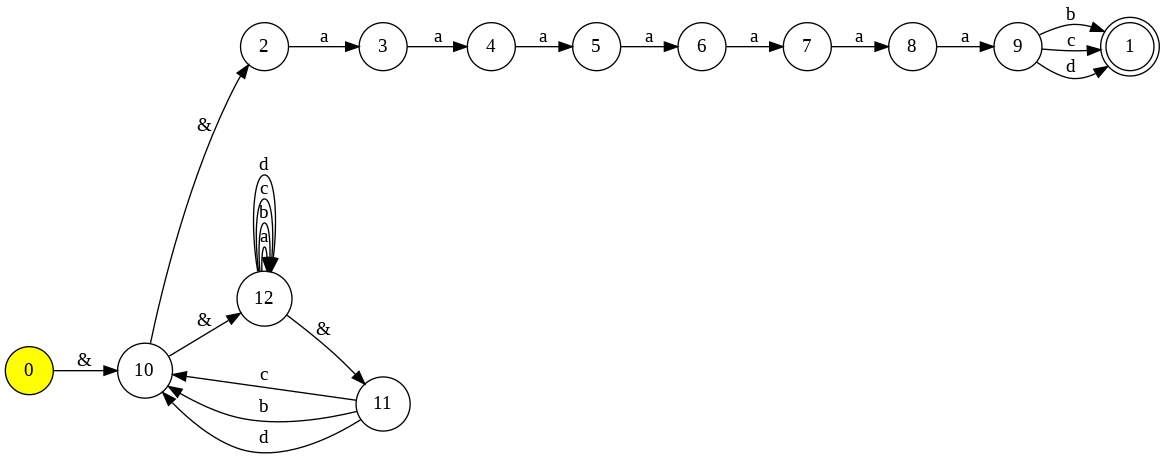

Automato 1 :  (((a+b+c+d)*b)*(c*)(aa*caa*caa*caa*caa*+aa*caa*caa*caa*+aa*caa*caa*+aa*caa*+aa*))b 



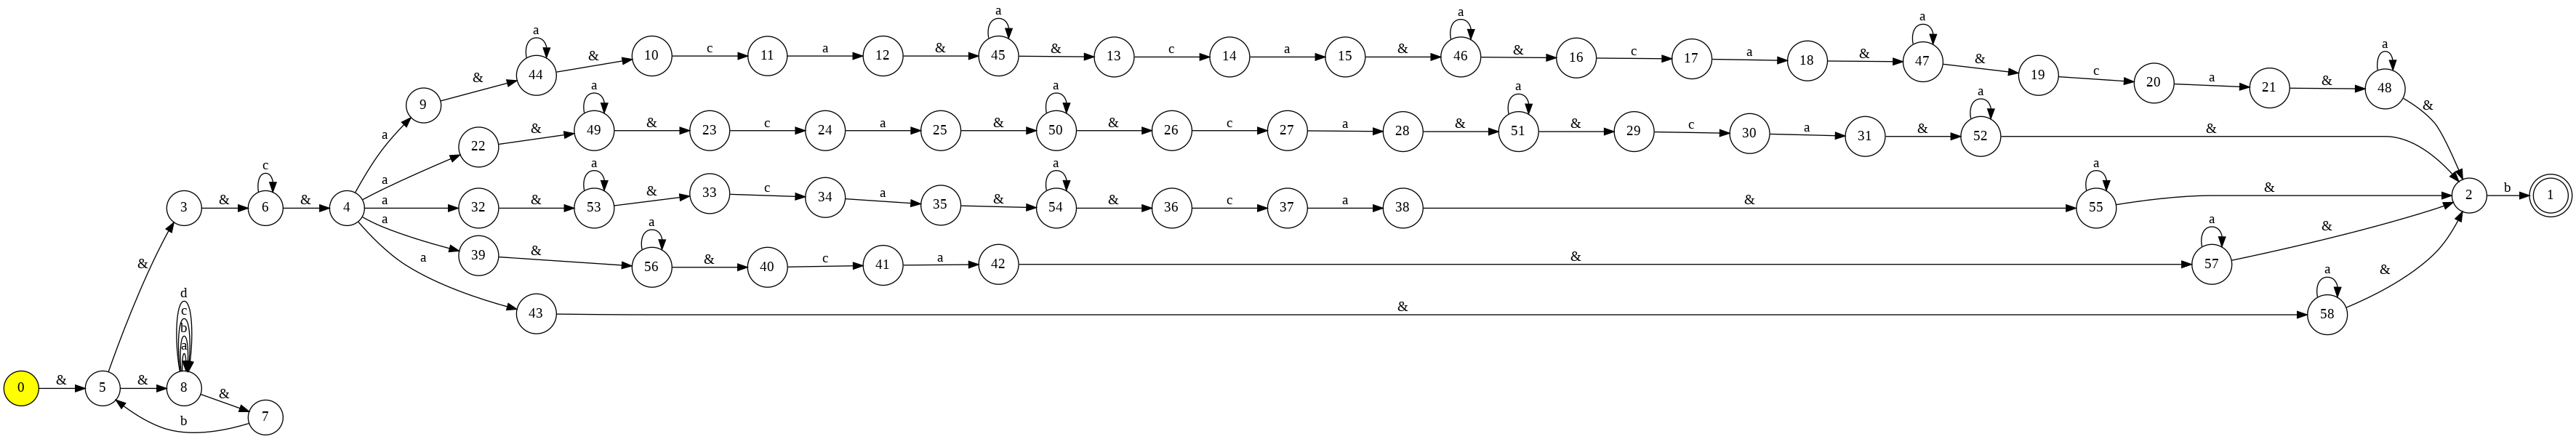

Automato 2 :  ((a+b+c+d)*(c+a+b))*ddbddbdddd(b+c+a) 



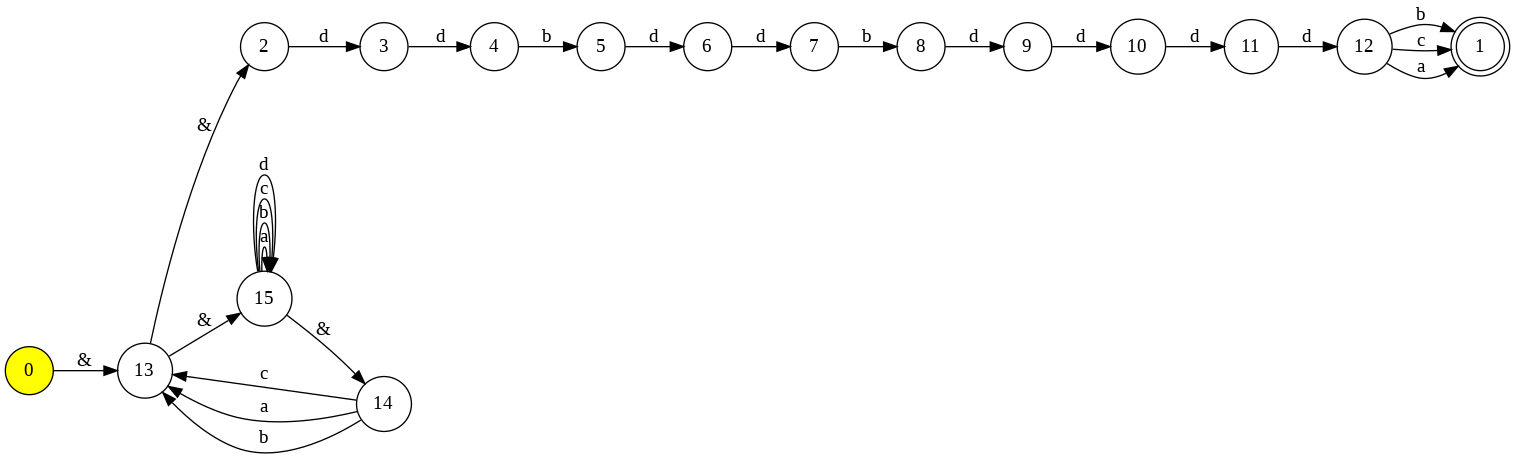

In [ ]:
#Desenhando os grafos dos automatos (com as funções da questao 1)
#nesse caso, todos tera estado inicial no 0 e estado final no 1, conforme bateria de testes

desenharAuto(automato)

Por causa do cárater recursivo do nosso código, cadeias de texto com muitas letras causavam uma demora excessiva quando não havia o pedido nos itens 1 e 3 e a cadeia de texto era grande(acima de 30 caracteres).

A solução para esse problema foi desenvolver um automato AFN para esses itens, que melhorou consideravelmente a questão do tempo.

Abaixo segue o algoritmo desenvolvido.

In [ ]:
# Criação do Automato AFN da Questao 3.1
automato31 = [[0,2,'a'],[2,3,'a'],[3,4,'a'],[4,5,'a'],[5,6,'a'],[6,7,'a'],[7,8,'a']]
for i in range(8):
  automato31.append([i,0,'d'])
  automato31.append([i,0,'b'])
  automato31.append([i,0,'c'])
automato31.append([8,1,'d'])
automato31.append([8,1,'b'])
automato31.append([8,1,'c'])
automato31.append([8,9,'a'])
automato31.append([9,9,'a'])
automato31.append([9,0,'d'])
automato31.append([9,0,'b'])
automato31.append([9,0,'c'])

# Criação do Automato AFN da Questao 3.3
automato33 = [[0,2,'d'],[2,3,'d'],[3,4,'b'],[4,5,'d'],[5,6,'d'],[6,7,'b'],[7,8,'d'],[8,9,'d'],[9,10,'d'],[10,11,'d']]
for i in range(11):
  automato33.append([i,0,'a'])
  automato33.append([i,0,'c'])

automato33.append([0,0,'b'])
automato33.append([2,0,'b'])
automato33.append([3,0,'d'])
automato33.append([4,0,'b'])
automato33.append([5,0,'b'])
automato33.append([7,0,'b'])
automato33.append([6,0,'d'])
automato33.append([8,0,'b'])
automato33.append([9,0,'b'])
automato33.append([10,0,'b'])

automato33.append([11,1,'a'])
automato33.append([11,1,'b'])
automato33.append([11,1,'c'])

automato33.append([11,12,'d'])
automato33.append([12,12,'d'])
automato33.append([12,0,'a'])
automato33.append([12,0,'b'])
automato33.append([12,0,'c'])

# Automatos que serão utilizados para testes
automatov2 = []
automatov2.append(automato31)
automatov2.append(automato[1])
automatov2.append(automato33)

Para desenhar o automato acima e diminuir o número de arcos desenhados, "uniu-se" arcos que possuiam o mesmo estado corrente e estado futuro, separados por vírgulas.

Automatos que serão utilizados:

Automato item 1 :


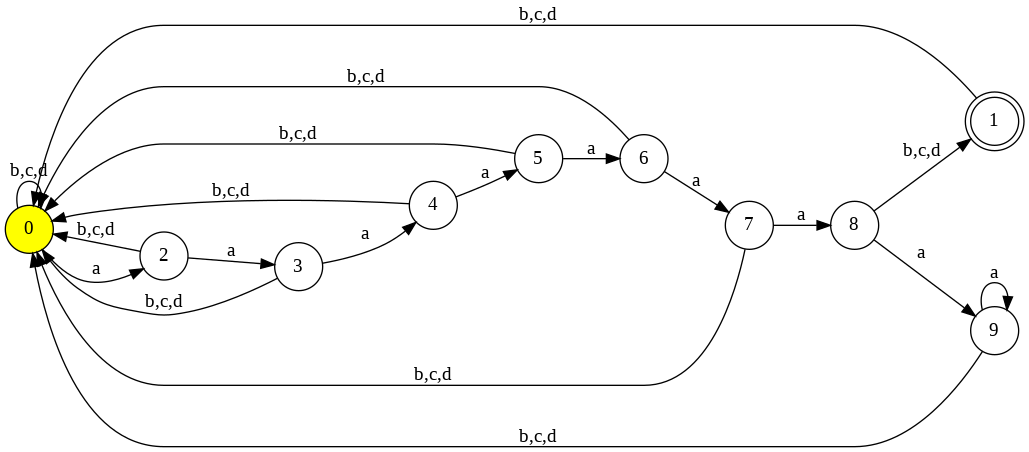


Automato item 2 :


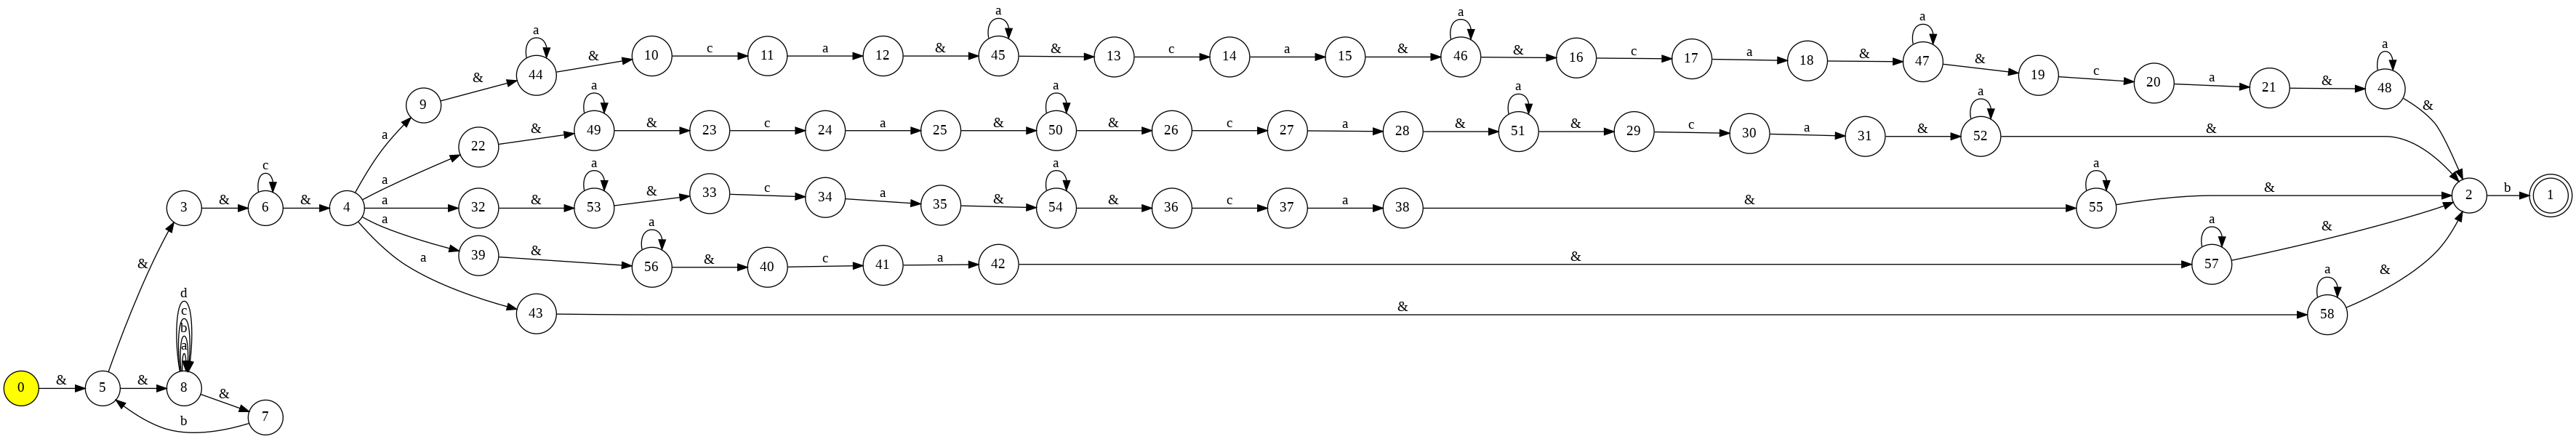


Automato item 3 :


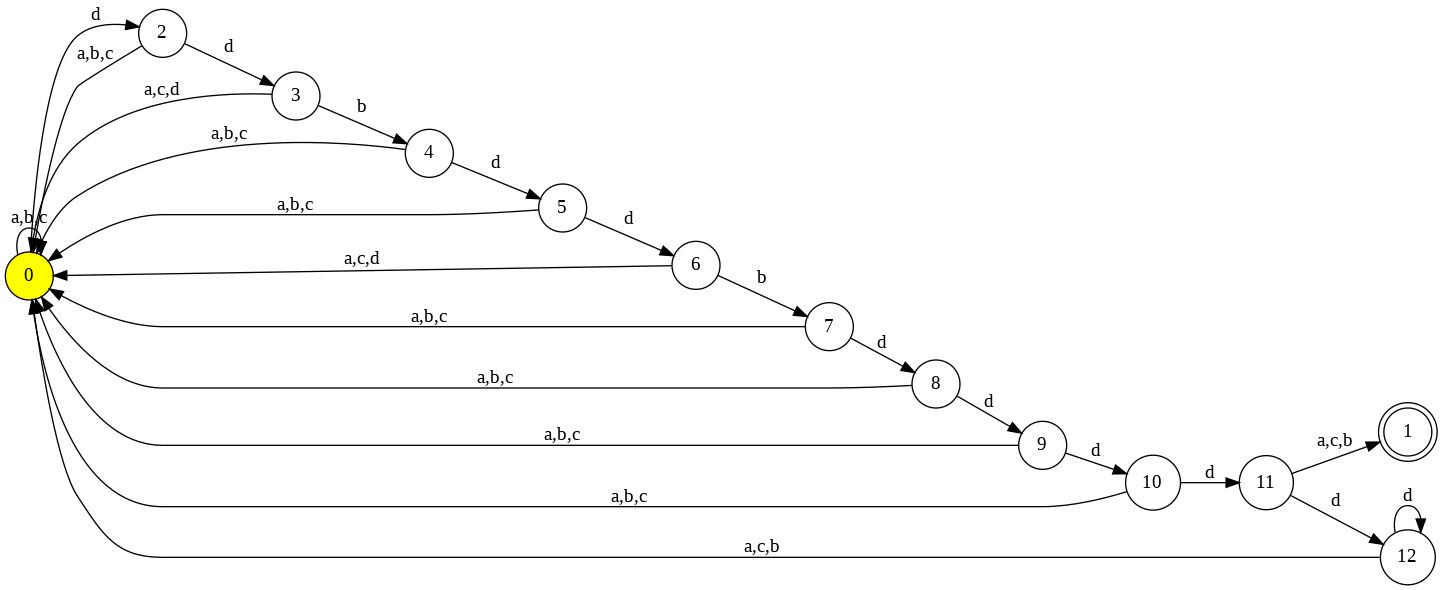

In [ ]:
# Criando automato que sera desenhado
automato312 = [[0,2,'a'],[2,3,'a'],[3,4,'a'],[4,5,'a'],[5,6,'a'],[6,7,'a'],[7,8,'a']]
for i in range(8):
  automato312.append([i,0,'b,c,d'])
automato312.append([8,1,'b,c,d'])
automato312.append([8,9,'a'])
automato312.append([9,9,'a'])
automato312.append([9,0,'b,c,d'])

automato332 = [[0,2,'d'],[2,3,'d'],[3,4,'b'],[4,5,'d'],[5,6,'d'],[6,7,'b'],[7,8,'d'],[8,9,'d'],[9,10,'d'],[10,11,'d']]
automato332.append([0,0,'a,b,c'])
automato332.append([2,0,'a,b,c'])
automato332.append([3,0,'a,c,d'])
automato332.append([4,0,'a,b,c'])
automato332.append([5,0,'a,b,c'])
automato332.append([7,0,'a,b,c'])
automato332.append([6,0,'a,c,d'])
automato332.append([8,0,'a,b,c'])
automato332.append([9,0,'a,b,c'])
automato332.append([10,0,'a,b,c'])
automato332.append([11,1,'a,c,b'])
automato332.append([11,12,'d'])
automato332.append([12,12,'d'])
automato332.append([12,0,'a,c,b'])

automatov22 = []
automatov22.append(automato312)
automatov22.append(automato[1])
automatov22.append(automato332)

# Desenhando os automatos do item 1(AFN),2(&-AFN)e 3(AFN) que serão utilizados
print("Automatos que serão utilizados:")
for i in range(len(automatov22)):
  print("\nAutomato item",i+1,":")
  dot=Source(dfa2gv(automatov22[i]))
  valor = "automato"+str(i)
  dot.render(format="png",filename=valor)
  display(Image(str(valor+'.png')))

In [ ]:
# Essa função se assemelha a função da questão 2, porém, ao ser encontrada a expressão
# a função para e retorna True.
# Essa função também guarda o índice da cadeia para posterior impressão
def validandoCadeia3(auto, cadeia, estadoinicial, cont, lista, item):    
  if estadoinicial == 1:
    if item == 1:
      lista[0].append((cont-1))
    elif item == 3:
      lista[2].append((cont-1))
    return True
  valido1 = False
  valido2 = False
  for arco in auto:    
    if arco[0]==estadoinicial:     
      if cont < len(cadeia):
        if arco[2] == cadeia[cont]:
          if item == 2 and cadeia[cont]=='b':
            lista[1].append(cont) 
          if validandoCadeia3(auto, cadeia, arco[1], cont+1, lista,item):
            return True                   
      if arco[2] == '&':
        if validandoCadeia3(auto, cadeia, arco[1], cont, lista, item):
          return True             
  return False

# Essa função testa e imprime o resultado dos itens 1, 2 e 3 da questão 3
def q3(auto2, text):
  cadeiaNova = transformandoCadeia(text)
  lista = [[],[-1],[]]
  cadeiaNova.append('c')
  item1 = validandoCadeia3(auto2[0], cadeiaNova, 0, 0, lista, 1)
  item2 = validandoCadeia3(auto2[1], cadeiaNova, 0, 0, lista, 2)
  item3 = validandoCadeia3(auto2[2], cadeiaNova, 0, 0, lista, 3)
  if item1 == True:
    palavra = ''
    for i in range((lista[0][0]-7),lista[0][0]):
      palavra+= text[i]
    print("Palavra de 7 letras ENCONTRADA: ", palavra)    
  else:
    print("Palavra de 7 letras NÃO encontrada!")  
  if item2 == True:
    sentenca = ''
    for i in range(lista[1][(len(lista[1])-2)]+1,lista[1][(len(lista[1])-1)]+1):
      sentenca+= text[i]
    print("Sentença com menos de 6 palavras ENCONTRADA: ", sentenca)    
  else:
    print("Sentença com menos de 6 palavras NÃO encontrada!")
  if item3 == True:
    data = ''
    for i in range((lista[2][0]-10),lista[2][0]):
      data+= text[i]
    print("Data ENCONTRADA: ", data)    
  else:
    print("Nenhuma data no formanto ddbddbddd NÃO encontrada!")   

In [ ]:
# Testes para a Questão 3

testes = []
testes.append("palavraGigante pipocas.  sss11/15/8558")
testes.append("matheus")
testes.append("Samara.")
testes.append("9912912matheus")
testes.append("m1atheus")
testes.append("9912912matheus#! oi,")
testes.append("m1atheus")
testes.append("31/12/1998")
testes.append("@!!(((31/12/1998)))")
testes.append("31/12/199Q8")
testes.append(" 12345terceira segunda primeira")
testes.append("somatoria,um dois tres 03/05/1500quatro cinco seis.")
testes.append(" abAcaxi Frase 1extensa abacaxi palavra palavra  palavra palavra palavra.\tteste.")
testes.append("PAlavra palavra 27/03/1992 palavra palavra palavra. teste teste.")

for i in testes:
  print("Texto:",i)
  q3(automatov2,i)
  print("")

Texto: palavraGigante pipocas.  sss11/15/8558
Palavra de 7 letras ENCONTRADA:  pipocas
Sentença com menos de 6 palavras ENCONTRADA:  palavraGigante pipocas.
Data ENCONTRADA:  11/15/8558

Texto: matheus
Palavra de 7 letras ENCONTRADA:  matheus
Sentença com menos de 6 palavras NÃO encontrada!
Nenhuma data no formanto ddbddbddd NÃO encontrada!

Texto: Samara.
Palavra de 7 letras NÃO encontrada!
Sentença com menos de 6 palavras ENCONTRADA:  Samara.
Nenhuma data no formanto ddbddbddd NÃO encontrada!

Texto: 9912912matheus
Palavra de 7 letras ENCONTRADA:  matheus
Sentença com menos de 6 palavras NÃO encontrada!
Nenhuma data no formanto ddbddbddd NÃO encontrada!

Texto: m1atheus
Palavra de 7 letras NÃO encontrada!
Sentença com menos de 6 palavras NÃO encontrada!
Nenhuma data no formanto ddbddbddd NÃO encontrada!

Texto: 9912912matheus#! oi,
Palavra de 7 letras ENCONTRADA:  matheus
Sentença com menos de 6 palavras ENCONTRADA:   oi,
Nenhuma data no formanto ddbddbddd NÃO encontrada!

Texto: m1a